# # SpringBoard Capstone2: Direct Marketing
## Unit20: Metrics
> Data from Kaggle.com: https://www.kaggle.com/c/bankdirectmarketing/data 

In [1]:
# pip install imbalanced-learn

In [2]:
# check version number
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE
from collections import Counter

0.8.0


In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [4]:
market_pre = pd.read_csv('Market_explored.csv', index_col = 0)
print(market_pre.head())

          age           job   marital            education  default housing  \
RecordID                                                                      
13783      49        admin.  divorced  professional.course       no     yes   
23986      52      services   married          high.school  unknown     yes   
20663      46   blue-collar  divorced             basic.9y       no      no   
13958      26  entrepreneur    single          high.school      yes     yes   
28184      47        admin.    single    university.degree       no      no   

         loan   contact month day_of_week  ...  campaign  pdays  previous  \
RecordID                                   ...                              
13783     yes  cellular   aug         mon  ...         1    115         2   
23986      no  cellular   may         mon  ...         1    402         2   
20663      no  cellular   apr         wed  ...         1    999         1   
13958     yes  cellular   aug         fri  ...        28    9

In [5]:
cat = market_pre[['job', 'marital', 'education', 'default', 'housing', \
 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]
market_cat = pd.get_dummies(cat,drop_first = True)
print(market_cat.shape)
market_cat.head()

(22500, 43)


,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
RecordID,,,,,,,,,,,,,,,,,,,,,
13783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
23986,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
20663,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13958,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
28184,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [6]:
num = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', \
             'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
market_num = market_pre[num]
market_all = market_cat.join(market_num)
market_all.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
RecordID,,,,,,,,,,,,,,,,,,,,,
13783,0,0,0,0,0,0,0,0,0,0,...,49,4457,1,115,2,1.4,92.479703,-35.498996,0.705058,4990.198481
23986,0,0,0,0,0,0,1,0,0,0,...,52,4797,1,402,2,-1.8,93.439161,-39.331320,4.245479,5144.563621
20663,1,0,0,0,0,0,0,0,0,0,...,46,169,1,999,1,-1.8,93.075000,-47.100000,1.445000,5099.100000
13958,0,1,0,0,0,0,0,0,0,0,...,26,376,28,999,0,1.4,93.444000,-36.100000,4.967000,5228.100000
28184,0,0,0,0,0,0,0,0,0,0,...,47,3033,1,252,4,-3.4,94.352376,-33.073620,1.208702,5025.420036


In [18]:
# do the procedures again
X = market_all
y = market_pre['subscribe']

over = SMOTE(sampling_strategy=0.9)
X, y = over.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [21]:
# Try RandomSearchCV using more hyper parameters
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1, scoring = 'f1_macro')
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1, scoring='f1_macro', verbose=2)

In [22]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [28]:
# Extract the best decision forest after randomsearch
best_clf = rf_random.best_estimator_
y_pred = best_clf.predict(X_test)

#f1_macro
f1_macro = f1_score(y_test, y_pred, average='macro')
print('f1_macro_random: ', f1_macro)

# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

f1_macro_random:  0.9269637105912469
[[3747  181]
 [ 358 3143]]


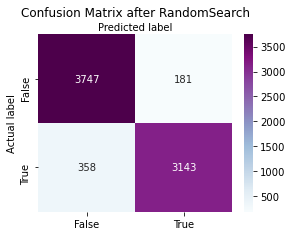

In [31]:
# Create heatmap from the confusion matrix
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(4, 3))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='BuPu', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix after RandomSearch')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.show()